<a href="https://colab.research.google.com/github/vpapoglou/Machine-Learning-Auth/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Φόρτωση του Dataset
df = pd.read_csv('dataset.csv')

# Αρχικές στήλες
print("Αρχικές στήλες:", df.columns.tolist())

metadata_cols = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']

# Δημιουργία dataframe με τα metadata
df_metadata = df[metadata_cols].copy()

# Δημιουργία dataframe με τα χαρακτηριστικά για το clustering
df_features = df.drop(columns=metadata_cols)

# Μετατροπή της στήλης 'explicit' από True/False σε 1/0
if 'explicit' in df_features.columns:
    df_features['explicit'] = df_features['explicit'].astype(int)

# One-Hot Encoding για τα Genres
# Αυτό θα δημιουργήσει πολλές νέες στήλες (μια για κάθε είδος μουσικής)
df_features_encoded = pd.get_dummies(df_features, columns=['track_genre'])

# Κανονικοποίηση (Scaling)
# Χρησιμοποιούμε StandardScaler για να φέρουμε όλα τα χαρακτηριστικά στην ίδια κλίμακα (Z-score scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features_encoded)

# Μετατροπή ξανά σε DataFrame για ευκολία
df_final = pd.DataFrame(X_scaled, columns=df_features_encoded.columns)

# Εμφάνιση αποτελεσμάτων
print("\nΔιαστάσεις τελικού Dataset:", df_final.shape)
print("\nΔείγμα των πρώτων γραμμών του επεξεργασμένου dataset:")
print(df_final.head())

Αρχικές στήλες: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

Διαστάσεις τελικού Dataset: (114000, 129)

Δείγμα των πρώτων γραμμών του επεξεργασμένου dataset:
   popularity  duration_ms  explicit  danceability    energy       key  \
0    1.782627     0.024575 -0.305767      0.629244 -0.717148 -1.210442   
1    0.975633    -0.730859 -0.305767     -0.845908 -1.889980 -1.210442   
2    1.065299    -0.160332 -0.305767     -0.742186 -1.122669 -1.491343   
3    1.692961    -0.243214 -0.305767     -1.733304 -2.312994 -1.491343   
4    2.186125    -0.271919 -0.305767      0.295030 -0.788711 -0.929541   

   loudness      mode  speechiness  acousticness  ...  track_genre_spanish  \
0  0.300828 -1.326281     0.551848     -0.850202  ...            -0.094072   
1 -1.7847

Έναρξη εκπαίδευσης K-Means για διαφορετικά k...
Ολοκληρώθηκε για k=2, SSE=14423469.60
Ολοκληρώθηκε για k=3, SSE=14272096.80
Ολοκληρώθηκε για k=5, SSE=14016358.57
Ολοκληρώθηκε για k=7, SSE=13754396.97
Ολοκληρώθηκε για k=10, SSE=13370978.96
Ολοκληρώθηκε για k=15, SSE=12773647.17
Ολοκληρώθηκε για k=20, SSE=12188704.40


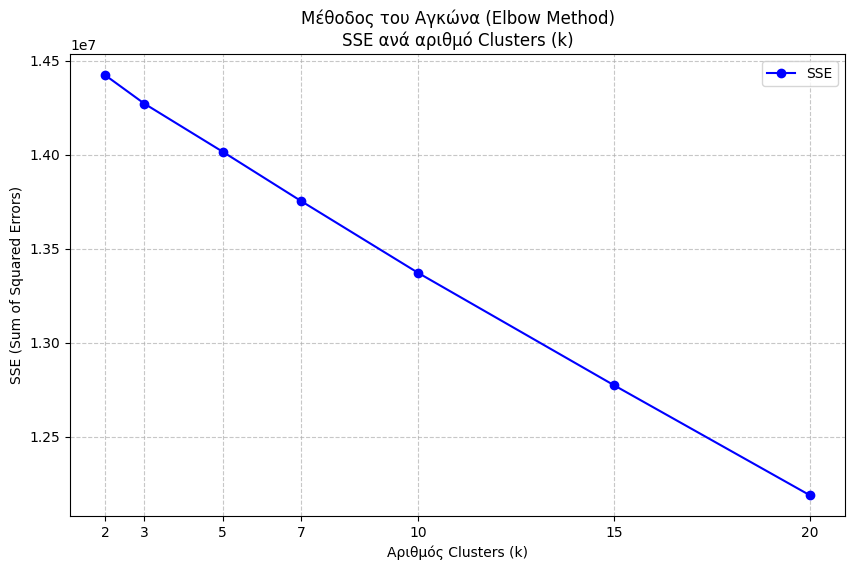

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = [2, 3, 5, 7, 10, 15, 20]
sse_list = []

print("Έναρξη εκπαίδευσης K-Means για διαφορετικά k...")

# Επανάληψη για κάθε k
for k in k_values:
    # Δημιουργία του μοντέλου
    # n_init=10: Τρέχει τον αλγόριθμο 10 φορές με διαφορετικά αρχικά κέντρα και κρατάει το καλύτερο
    # random_state=42: Για να έχουμε πάντα τα ίδια αποτελέσματα
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Εκπαίδευση στα κανονικοποιημένα δεδομένα
    kmeans.fit(df_final)

    # Αποθήκευση του SSE
    sse_list.append(kmeans.inertia_)

    print(f"Ολοκληρώθηκε για k={k}, SSE={kmeans.inertia_:.2f}")

# Δημιουργία του Line Plot (Elbow Method)
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_list, marker='o', linestyle='-', color='blue', label='SSE')

plt.title('Μέθοδος του Αγκώνα (Elbow Method)\nSSE ανά αριθμό Clusters (k)')
plt.xlabel('Αριθμός Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')

# Ρύθμιση του άξονα Χ να δείχνει ακριβώς τις τιμές k που τρέξαμε
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

In [12]:
from sklearn.cluster import KMeans

#Επιλογή του βέλτιστου k
optimal_k = 20

print(f"Εκπαίδευση τελικού μοντέλου με k={optimal_k}...")

#Εκπαίδευση του μοντέλου με το επιλεγμένο k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(df_final)

#Ανάκτηση των Labels (σε ποια ομάδα ανήκει το κάθε τραγούδι)
#Τα labels είναι αριθμοί από 0 έως 19
labels = kmeans_final.labels_

#Προσθήκη των labels στο DataFrame με τα Metadata
df_metadata['cluster'] = labels

#Εμφάνιση αποτελεσμάτων
print("\n--- Κατανομή Τραγουδιών στα Clusters ---")
print(df_metadata['cluster'].value_counts().sort_index())

print("\n--- Δείγμα Τραγουδιών ανά Cluster ---")
#Εμφάνιση 2 τραγουδιών από κάθε cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    print(df_metadata[df_metadata['cluster'] == i][['artists', 'track_name']].head(2).to_string(index=False))

Εκπαίδευση τελικού μοντέλου με k=20...

--- Κατανομή Τραγουδιών στα Clusters ---
cluster
0     23102
1     13962
2      2000
3      3000
4      1998
5      1000
6      6974
7      3000
8      4000
9      1000
10     1000
11     6982
12     4000
13     7181
14     2000
15     6000
16     1000
17     5998
18     7921
19    11882
Name: count, dtype: int64

--- Δείγμα Τραγουδιών ανά Cluster ---

Cluster 0:
               artists          track_name
Limoblaze;Lecrae;Happi Jireh (My Provider)
                Criolo      Ainda Há Tempo

Cluster 1:
     artists       track_name
 Gen Hoshino           Comedy
Ben Woodward Ghost - Acoustic

Cluster 2:
         artists           track_name
 Cradle Of Filth Hallowed Be Thy Name
Make Them Suffer           Doomswitch

Cluster 3:
                              artists                                track_name
XXXTENTACION;Lil Pump;Swae Lee;Maluma Arms Around You (feat. Maluma & Swae Lee)
                       RADWIMPS;Toaka                            

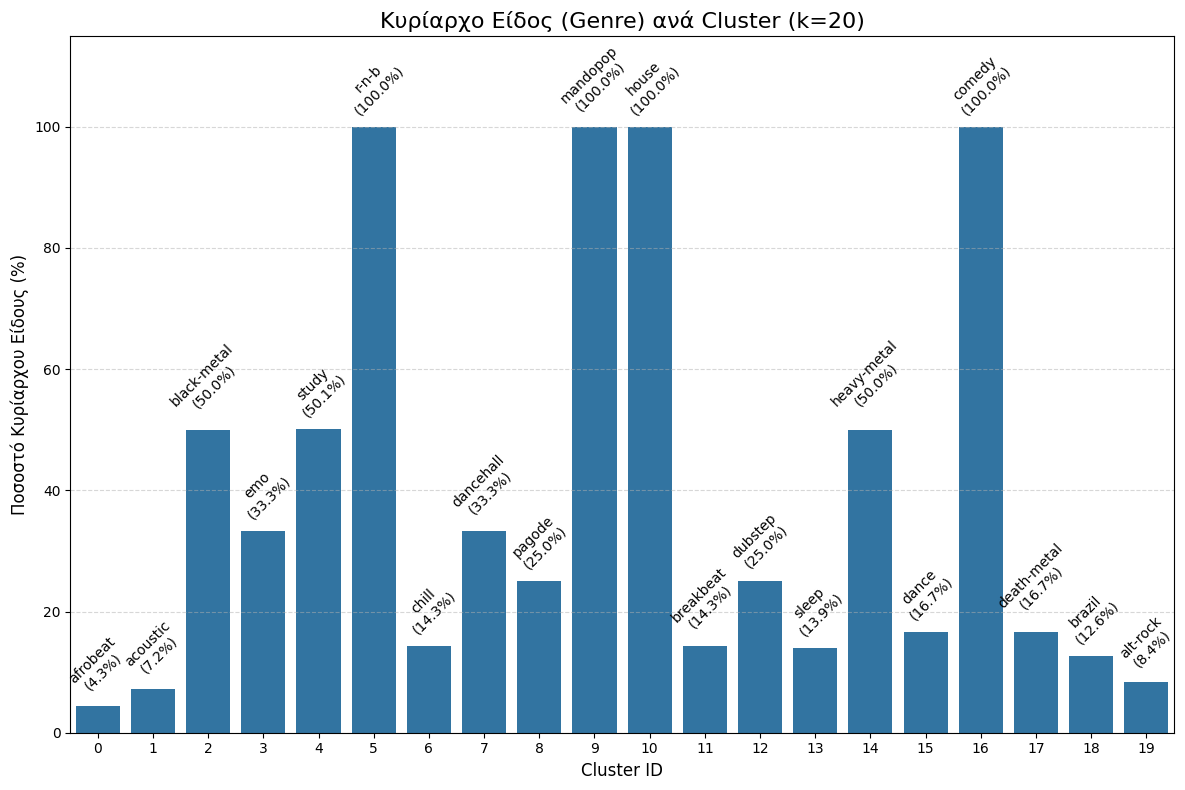

    cluster dominant_genre  percentage
0         0       afrobeat    4.328630
1         1       acoustic    7.162298
2         2    black-metal   50.000000
3         3            emo   33.333333
4         4          study   50.050050
5         5          r-n-b  100.000000
6         6          chill   14.338973
7         7      dancehall   33.333333
8         8         pagode   25.000000
9         9       mandopop  100.000000
10       10          house  100.000000
11       11      breakbeat   14.322544
12       12        dubstep   25.000000
13       13          sleep   13.911711
14       14    heavy-metal   50.000000
15       15          dance   16.666667
16       16         comedy  100.000000
17       17    death-metal   16.672224
18       18         brazil   12.624669
19       19       alt-rock    8.416092


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

optimal_k = 20

# 2. Ανάλυση Κυρίαρχου Είδους
labels = kmeans_final.labels_
df_analysis = pd.DataFrame({
    'cluster': labels,
    'track_genre': df['track_genre']
})

cluster_stats = []
for i in range(optimal_k):
    cluster_data = df_analysis[df_analysis['cluster'] == i]
    genre_counts = cluster_data['track_genre'].value_counts()

    if not genre_counts.empty:
        dominant_genre = genre_counts.index[0]
        dominant_count = genre_counts.iloc[0]
        total_count = len(cluster_data)
        percentage = (dominant_count / total_count) * 100

        cluster_stats.append({
            'cluster': i,
            'dominant_genre': dominant_genre,
            'percentage': percentage
        })

df_stats = pd.DataFrame(cluster_stats)

#Δημιουργία Ραβδογράμματος
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='cluster', y='percentage', data=df_stats)

#Προσθήκη ετικετών
for index, row in df_stats.iterrows():
    barplot.text(row.name, row.percentage + 2,
                 f"{row.dominant_genre}\n({row.percentage:.1f}%)",
                 color='black', ha="center", fontsize=10, rotation=45)

plt.title(f'Κυρίαρχο Είδος (Genre) ανά Cluster (k={optimal_k})', fontsize=16)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Ποσοστό Κυρίαρχου Είδους (%)', fontsize=12)
plt.ylim(0, 115)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Εκτύπωση του πίνακα με τα ποσοστά
print(df_stats)

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

# 1. Αναζήτηση του τραγουδιού
# Χρησιμοποιούμε string search για να βρούμε το "Holy Wars" του "Megadeth"
target_song = df_metadata[
    df_metadata['artists'].str.contains("Slayer", case=False) &
    df_metadata['track_name'].str.contains("Angel of Death", case=False)
]

if not target_song.empty:
    # Παίρνουμε το index του τραγουδιού
    target_index = target_song.index[0]
    target_cluster = target_song.iloc[0]['cluster']
    target_title = target_song.iloc[0]['track_name']
    target_artist = target_song.iloc[0]['artists']

    print(f"Επιλεγμένο Κομμάτι: '{target_title}' από {target_artist}")
    print(f"Ανήκει στο Cluster: {target_cluster}")

    # 2. Ανάκτηση Χαρακτηριστικών
    # Το διάνυσμα χαρακτηριστικών του "Holy Wars" (scaled)
    target_vector = df_final.iloc[target_index].values.reshape(1, -1)

    # Βρίσκουμε όλα τα τραγούδια που ανήκουν στο ίδιο Cluster
    cluster_indices = df_metadata[df_metadata['cluster'] == target_cluster].index
    cluster_features = df_final.loc[cluster_indices]

    # 3. Υπολογισμός Ευκλείδειας Απόστασης
    # Υπολογίζουμε την απόσταση του Holy Wars από ΟΛΑ τα άλλα τραγούδια του cluster
    distances = euclidean_distances(cluster_features, target_vector).flatten()

    # 4. Εύρεση των Top-3
    # Φτιάχνουμε ένα προσωρινό dataframe με τα αποτελέσματα
    recommendations = df_metadata.loc[cluster_indices].copy()
    recommendations['distance'] = distances

    # Ταξινομούμε κατά αύξουσα απόσταση (μικρότερη = πιο όμοιο)
    # Παραλείπουμε το πρώτο (iloc[0]) γιατί είναι το ίδιο το τραγούδι (απόσταση 0)
    top_3 = recommendations.sort_values('distance').iloc[1:4]

    print("\n--- Top 3 Προτεινόμενα Τραγούδια ---")
    print(top_3[['artists', 'track_name', 'distance']].to_string(index=False))

else:
    print("Το τραγούδι δεν βρέθηκε.")

Επιλεγμένο Κομμάτι: 'Angel Of Death' από Slayer
Ανήκει στο Cluster: 17

--- Top 3 Προτεινόμενα Τραγούδια ---
        artists               track_name  distance
      Testament Brotherhood of the Snake  1.456769
         Gojira           Into The Storm  1.467133
Cannibal Corpse      Evisceration Plague  1.527709


In [15]:
from sklearn.metrics.pairwise import cosine_distances

# Υπολογισμός Απόστασης Συνημιτόνου (Cosine Distance)
cosine_dists = cosine_distances(cluster_features, target_vector).flatten()

# Εύρεση των Top-3
recommendations_cos = df_metadata.loc[cluster_indices].copy()
recommendations_cos['cosine_distance'] = cosine_dists

# Ταξινόμηση και επιλογή (παραλείπουμε το πρώτο που είναι το ίδιο το τραγούδι)
top_3_cos = recommendations_cos.sort_values('cosine_distance').iloc[1:4]

print("\n--- Top 3 Προτεινόμενα (Cosine Distance) ---")
print(top_3_cos[['artists', 'track_name', 'cosine_distance']].to_string(index=False))


--- Top 3 Προτεινόμενα (Cosine Distance) ---
        artists               track_name  cosine_distance
      Testament Brotherhood of the Snake         0.008399
         Gojira           Into The Storm         0.008433
Cannibal Corpse      Evisceration Plague         0.009220


# K = 10

In [16]:
from sklearn.cluster import KMeans

#Επιλογή του βέλτιστου k
optimal_k = 10

print(f"Εκπαίδευση τελικού μοντέλου με k={optimal_k}...")

#Εκπαίδευση του μοντέλου με το επιλεγμένο k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(df_final)

#Ανάκτηση των Labels (σε ποια ομάδα ανήκει το κάθε τραγούδι)
#Τα labels είναι αριθμοί από 0 έως 9
labels = kmeans_final.labels_

#Προσθήκη των labels στο DataFrame με τα Metadata
df_metadata['cluster'] = labels

#Εμφάνιση αποτελεσμάτων
print("\n--- Κατανομή Τραγουδιών στα Clusters ---")
print(df_metadata['cluster'].value_counts().sort_index())

print("\n--- Δείγμα Τραγουδιών ανά Cluster ---")
#Εμφάνιση 2 τραγουδιών από κάθε cluster
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    print(df_metadata[df_metadata['cluster'] == i][['artists', 'track_name']].head(2).to_string(index=False))

Εκπαίδευση τελικού μοντέλου με k=10...

--- Κατανομή Τραγουδιών στα Clusters ---
cluster
0     6445
1    16575
2    16847
3     8034
4    12940
5    19243
6    10974
7    14062
8     1000
9     7880
Name: count, dtype: int64

--- Δείγμα Τραγουδιών ανά Cluster ---

Cluster 0:
         artists           track_name
 Cradle Of Filth Hallowed Be Thy Name
Make Them Suffer           Doomswitch

Cluster 1:
          artists      track_name
The Neighbourhood    Daddy Issues
             MGMT Little Dark Age

Cluster 2:
     artists       track_name
 Gen Hoshino           Comedy
Ben Woodward Ghost - Acoustic

Cluster 3:
       artists    track_name
   Kurt Cobain She Only Lies
Mulatu Astatke        Tezeta

Cluster 4:
               artists                        track_name
Mohan;Murali;Chandiran Varraaru Vaarraaru Yaaru Varraaru
    Sean Paul;Dua Lipa                            No Lie

Cluster 5:
                                          artists                track_name
                        

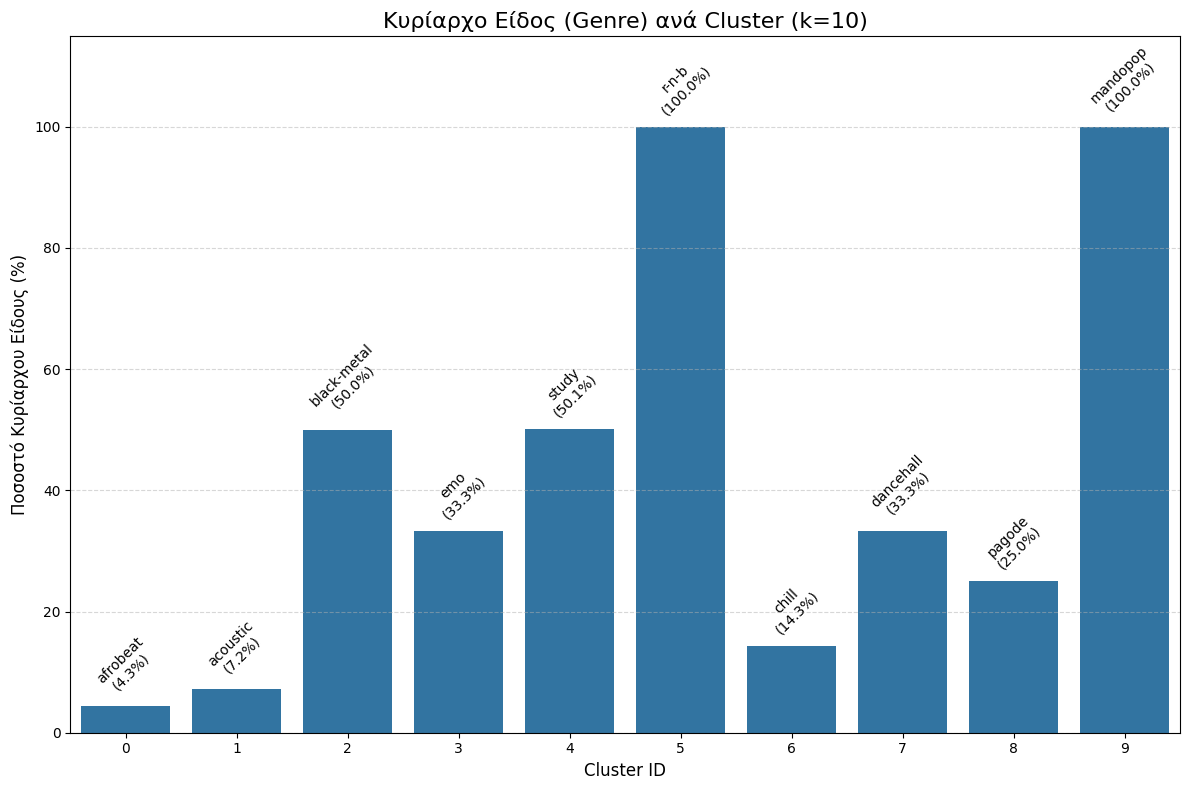

   cluster dominant_genre  percentage
0        0       afrobeat    4.328630
1        1       acoustic    7.162298
2        2    black-metal   50.000000
3        3            emo   33.333333
4        4          study   50.050050
5        5          r-n-b  100.000000
6        6          chill   14.338973
7        7      dancehall   33.333333
8        8         pagode   25.000000
9        9       mandopop  100.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

optimal_k = 10

# 2. Ανάλυση Κυρίαρχου Είδους
labels = kmeans_final.labels_
df_analysis = pd.DataFrame({
    'cluster': labels,
    'track_genre': df['track_genre']
})

cluster_stats = []
for i in range(optimal_k):
    cluster_data = df_analysis[df_analysis['cluster'] == i]
    genre_counts = cluster_data['track_genre'].value_counts()

    if not genre_counts.empty:
        dominant_genre = genre_counts.index[0]
        dominant_count = genre_counts.iloc[0]
        total_count = len(cluster_data)
        percentage = (dominant_count / total_count) * 100

        cluster_stats.append({
            'cluster': i,
            'dominant_genre': dominant_genre,
            'percentage': percentage
        })

df_stats = pd.DataFrame(cluster_stats)

#Δημιουργία Ραβδογράμματος
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='cluster', y='percentage', data=df_stats)

#Προσθήκη ετικετών
for index, row in df_stats.iterrows():
    barplot.text(row.name, row.percentage + 2,
                 f"{row.dominant_genre}\n({row.percentage:.1f}%)",
                 color='black', ha="center", fontsize=10, rotation=45)

plt.title(f'Κυρίαρχο Είδος (Genre) ανά Cluster (k={optimal_k})', fontsize=16)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Ποσοστό Κυρίαρχου Είδους (%)', fontsize=12)
plt.ylim(0, 115)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Εκτύπωση του πίνακα με τα ποσοστά
print(df_stats)

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

# 1. Αναζήτηση του τραγουδιού
# Χρησιμοποιούμε string search για να βρούμε το "Holy Wars" του "Megadeth"
target_song = df_metadata[
    df_metadata['artists'].str.contains("Slayer", case=False) &
    df_metadata['track_name'].str.contains("Angel of Death", case=False)
]

if not target_song.empty:
    # Παίρνουμε το index του τραγουδιού
    target_index = target_song.index[0]
    target_cluster = target_song.iloc[0]['cluster']
    target_title = target_song.iloc[0]['track_name']
    target_artist = target_song.iloc[0]['artists']

    print(f"Επιλεγμένο Κομμάτι: '{target_title}' από {target_artist}")
    print(f"Ανήκει στο Cluster: {target_cluster}")

    # 2. Ανάκτηση Χαρακτηριστικών
    # Το διάνυσμα χαρακτηριστικών του "Holy Wars" (scaled)
    target_vector = df_final.iloc[target_index].values.reshape(1, -1)

    # Βρίσκουμε όλα τα τραγούδια που ανήκουν στο ίδιο Cluster
    cluster_indices = df_metadata[df_metadata['cluster'] == target_cluster].index
    cluster_features = df_final.loc[cluster_indices]

    # 3. Υπολογισμός Ευκλείδειας Απόστασης
    # Υπολογίζουμε την απόσταση του Holy Wars από ΟΛΑ τα άλλα τραγούδια του cluster
    distances = euclidean_distances(cluster_features, target_vector).flatten()

    # 4. Εύρεση των Top-3
    # Φτιάχνουμε ένα προσωρινό dataframe με τα αποτελέσματα
    recommendations = df_metadata.loc[cluster_indices].copy()
    recommendations['distance'] = distances

    # Ταξινομούμε κατά αύξουσα απόσταση (μικρότερη = πιο όμοιο)
    # Παραλείπουμε το πρώτο (iloc[0]) γιατί είναι το ίδιο το τραγούδι (απόσταση 0)
    top_3 = recommendations.sort_values('distance').iloc[1:4]

    print("\n--- Top 3 Προτεινόμενα Τραγούδια ---")
    print(top_3[['artists', 'track_name', 'distance']].to_string(index=False))

else:
    print("Το τραγούδι δεν βρέθηκε.")

Επιλεγμένο Κομμάτι: 'Angel Of Death' από Slayer
Ανήκει στο Cluster: 0

--- Top 3 Προτεινόμενα Τραγούδια ---
        artists               track_name  distance
      Testament Brotherhood of the Snake  1.456769
         Gojira           Into The Storm  1.467133
Cannibal Corpse      Evisceration Plague  1.527709
